# Práctica 3

1238689 Montes Garay Lilyan Victoria

1201706 Torres Aragón Juan Jorge

**Ejercicio 1**

Utilizar las bibliotecas brindadas por el profesor para realizar la práctica. El alumno debe modelar el siguiente problema propuesto. Se requiere diseñar un controlador difuso para una lavadora, se le solicita al alumno que funga como experto del
dominio, por lo que deberá plasmar su expertis en un modelo computable, a través de reglas difusas. El sistema de lavado cuenta con sensores para: medir el peso de la carga y un sensor óptico para detectar el nivel de suciedad de la carga. Además el operador debería poder seleccionar de un catálogo (máximo 5 opciones) el tipo de ropa. Los elementos del sistema que se pueden afectar son: tiempo de lavado, tiempo de pre-lavado, intensidad de lavado, temperatura del agua, cantidad de detergente, cantidad de acondicionador, tiempo de enjuague, tiempo del ciclo de exprimido.

Dada las anteriores descripciones del sistema, el experto debe decidir cuáles son las variables de salida apropiadas para lograr los siguientes objetivos:

* Minimizar el tiempo de lavado
* Minimizar el agua empleada
* Minimizar la energía requerida
* Evitar daño en la ropa
* Minimizar el uso de detergentes

Proponer un Sistema de Inferencia Difuso que considere las entradas del sistema para mejora del ciclo de lavado de acuerdo a los objetivos propuestos por la empresa. En la documentación de este ejercicio, considerar:

* Por cada variable involucrada, justificar su función de membresía (tener en mente que es un proceso de percepción, por lo que se puede omitir algunos detalles cualitativos).
* Describir las reglas difusas 
    * Se puede describir todo el conjunto de reglas de forma general, o bien, una pequeña descripción con un ejemplo, por cada una de ellas.
* Realizar al menos 3 casos de prueba, describir cuanto se acerca el resultado del sistema con la decisión que el alumno hubiera considerado.


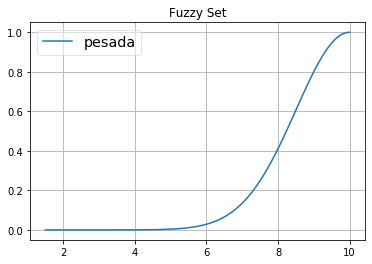

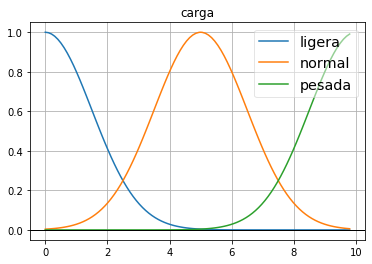

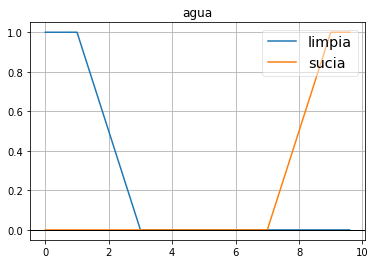

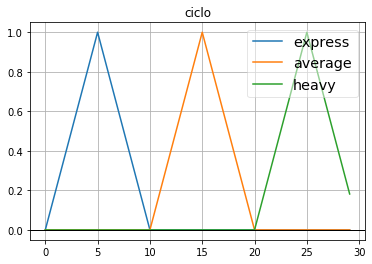


Evaluation of FIS with inputs:
carga: 8.183
agua: 8.59
	IF carga is ligera or agua is limpia THEN ciclo is express = [3.44789797e-07] with weight = 1
	IF carga is normal or agua is sucia THEN ciclo is average = [0.795] with weight = 1
	IF carga is pesada and agua is sucia THEN ciclo is heavy = [0.4801464] with weight = 1


In [10]:
from FuzzySystem.FuzzySet import  FuzzySet
from FuzzySystem.FuzzyVariable import  FuzzyVariable
from FuzzySystem.FuzzyInferenceSystem import  FuzzyInferenceSystem, Antecedent,Consequent, FuzzyRule 
from FuzzySystem.Defuzzifier import Centroid
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, GBellmf, Logmf, Tanhmf, Trapmf, Sigmoidmf, Cauchymf

#INPUTS

carga_ligera = FuzzySet('ligera', Gaussmf([1.5, 0]))
carga_normal = FuzzySet('normal', Gaussmf([1.5, 5]))
carga_pesada = FuzzySet('pesada', Gaussmf([1.5, 10]))
carga_pesada.show()
carga = FuzzyVariable('carga',[carga_ligera, carga_normal, carga_pesada], universe=[0, 10])
carga.show()

agua_limpia = FuzzySet('limpia', Trapmf([0,0,1,3]))
agua_sucia = FuzzySet('sucia', Trapmf([7,9,10,10]))
agua = FuzzyVariable('agua', [agua_limpia, agua_sucia], universe=[0, 10])
agua.show()

#OUTPUT

ciclo_express = FuzzySet('express', Trimf([0,5,10]))
ciclo_avg = FuzzySet('average', Trimf([10,15,20]))
ciclo_heavy = FuzzySet('heavy', Trimf([20,25,30]))
ciclo = FuzzyVariable('ciclo', [ciclo_express, ciclo_avg, ciclo_heavy], universe=[0, 30])
ciclo.show()

#RULES


#ant1  = Antecedent(carga['ligera'], conector=max)
#ant1.add(agua['limpia'])
ant1  = Antecedent(carga['ligera'] | agua['limpia'])
cont1 = Consequent([ciclo['express']])
rule1 = FuzzyRule(ant1, cont1)

ant2  = Antecedent(carga['normal'] | agua['sucia'])
cont2 = Consequent([ciclo['average']])
rule2 = FuzzyRule(ant2, cont2)


#ant3  = Antecedent(carga['pesada'], conector=min)
#ant3.add(agua['sucia'])
ant3 = Antecedent(carga['pesada']& agua['sucia'])
cont3 = Consequent([ciclo['heavy']])
rule3 = FuzzyRule(ant3, cont3)

#Building the FIS

fis = FuzzyInferenceSystem([rule1, rule2, rule3])

#FIS Evaluation

inputs = {'carga':8.183, 'agua':8.59}
result = fis.eval(inputs)
#print(result)

**Ejercicio 2**

Utilizar las bibliotecas brindadas por el profesor para realizar la práctica.

El alumno debe de proponer un problema en donde se realice una toma de decisión, en el cual, el alumno debe tener un nivel de expertis aceptable. Se deben cumplir con los siguientes requisitos:
    
* Mínimo 4 variables de entrada
* La cantidad mínima de salidas es uno (si el problema no es complejo, añada más)
* Mínimo 3 reglas difusas
Se deberá entregar un documento (tipo jupyter notebook ) que contenga los siguientes
puntos:
* Descripción del problema
    * Justificación; por qué es importante modelar este problema.
    * Especificar ejemplos de aplicación.
    * Describir cada una de las variables involucradas (entrada y salida).
* Por cada variable involucrada, justificar su función de membresía (tener en mente que es un proceso de percepción, por lo que se puede omitir algunos detalles cualitativos).
* Describir las reglas difusas
    * Se puede describir todo el conjunto de reglas de forma general, o bien, una pequeña descripción con un ejemplo, por cada una de ellas.
* Realizar al menos 3 casos de prueba, describir cuanto se acerca el resultado del sistema con la decisión que el alumno hubiera considerado.

**Ejercicio 3**

El alumno deberá describir (de forma breve) al menos 4 problemas en donde consideré que se podría aplicar un sistema de inferencia difuso y especificar la razón del por qué sería útil.

**Ejercicio 4**

El alumno deberá escribir una discusión del de éste tipo de sistemas, de su perspectiva de, en donde considere los siguientes puntos:

* Cómo han impactado en la industria
* Cuáles son las ventajas y desventajas (hacer énfasis en esto último) del desarrollo e implementación de estos sistemas.
* Cuál se imagina que sea el futuro de estos sistemas (investigar los avances en este campo)
* ¿Estos sistemas serían útiles para representar toda clase de conocimiento?, justifique su respuesta